<a href="https://colab.research.google.com/github/vimesh630/ML_CW/blob/main/Model_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [ ]:
# Import necessary libraries
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix
import numpy as np
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load JSON Results

In [ ]:
# Load JSON results
nn_results_path = '/content/drive/My Drive/ML Coursework/Model_Results/nn_results.json'
rf_results_path = '/content/drive/My Drive/ML Coursework/Model_Results/rf_results.json'

with open(nn_results_path, 'r') as f:
    nn_results = json.load(f)

with open(rf_results_path, 'r') as f:
    rf_results = json.load(f)

print("Neural Network and Random Forest results successfully loaded.")

Neural Network and Random Forest results successfully loaded.


Bar Plot for Accuracy Comparison

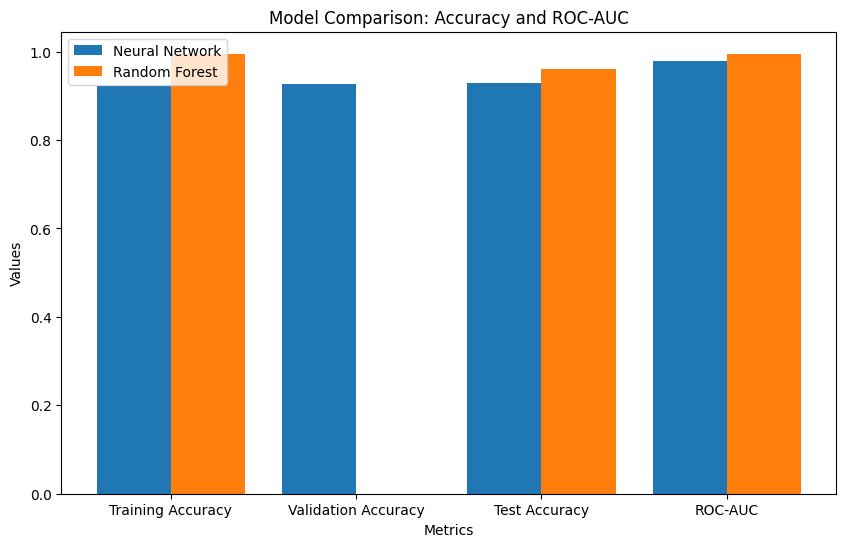

Neural Network Metrics: [0.9230126738548279, 0.9257129430770874, 0.9299434325853173, 0.9788685362616057]
Random Forest Metrics: [0.9953220918486285, 0, 0.9596568657922546, 0.9949411472666154]


In [ ]:
# Extract Metrics
metrics = ['Training Accuracy', 'Validation Accuracy', 'Test Accuracy', 'ROC-AUC']
nn_values = [
    nn_results['training_accuracy'],
    nn_results.get('validation_accuracy', 0),  # Replace None with 0 for Neural Network validation accuracy
    nn_results['test_accuracy'],
    nn_results['roc_auc']
]
rf_values = [
    rf_results['training_accuracy'],
    0,  # Replace None with 0 for Random Forest validation accuracy
    rf_results['test_accuracy'],
    rf_results['roc_auc']
]

# Bar Plot: Accuracy Comparison
x = range(len(metrics))
plt.figure(figsize=(10, 6))
plt.bar(x, nn_values, width=0.4, label='Neural Network', align='center')
plt.bar([p + 0.4 for p in x], rf_values, width=0.4, label='Random Forest', align='center')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Model Comparison: Accuracy and ROC-AUC')
plt.xticks([p + 0.2 for p in x], metrics)
plt.legend()
plt.show()

# Add context and display updated values for transparency
print(f"Neural Network Metrics: {nn_values}")
print(f"Random Forest Metrics: {rf_values}")

Confusion Matrices

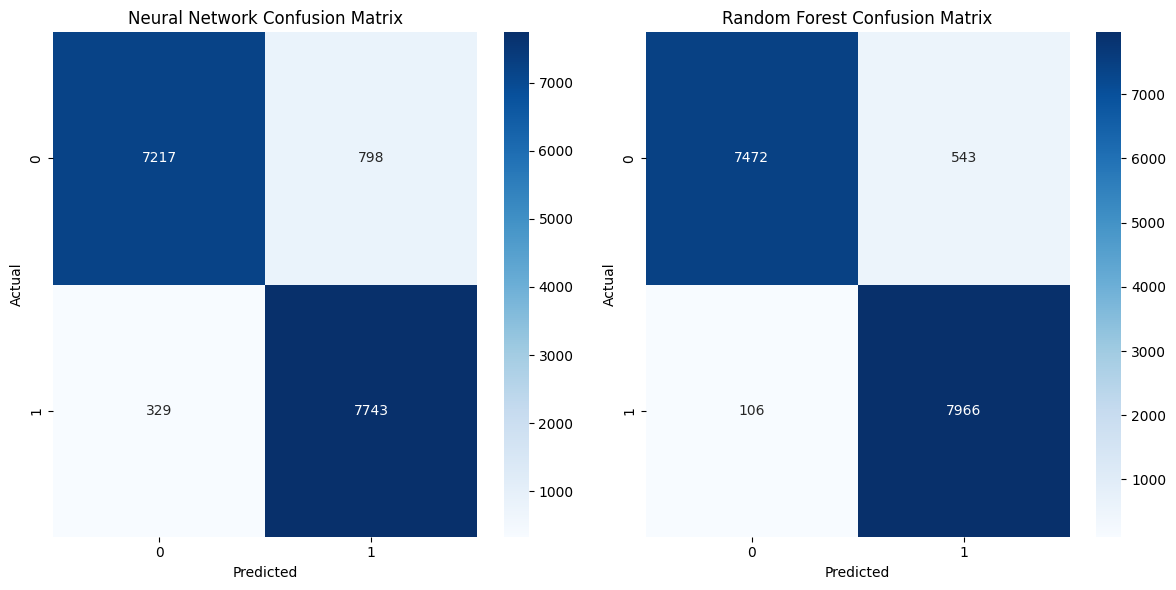

In [ ]:
# Plot Confusion Matrices
nn_conf_matrix = np.array(nn_results['confusion_matrix'])
rf_conf_matrix = np.array(rf_results['confusion_matrix'])

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.heatmap(nn_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Neural Network Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Random Forest Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

ROC Curves

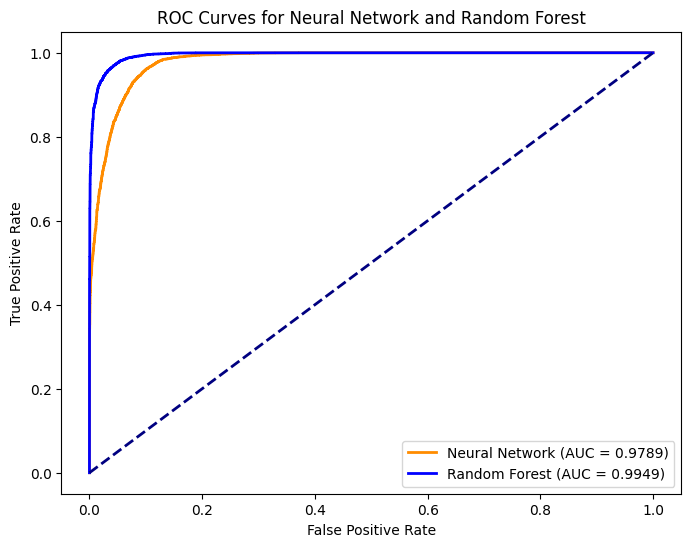

In [ ]:
# Plot ROC Curves
nn_fpr = nn_results['roc_curve']['fpr']
nn_tpr = nn_results['roc_curve']['tpr']
rf_fpr = rf_results['roc_curve']['fpr']
rf_tpr = rf_results['roc_curve']['tpr']

nn_roc_auc = nn_results['roc_auc']
rf_roc_auc = rf_results['roc_auc']

plt.figure(figsize=(8, 6))
plt.plot(nn_fpr, nn_tpr, color='darkorange', lw=2, label=f'Neural Network (AUC = {nn_roc_auc:.4f})')
plt.plot(rf_fpr, rf_tpr, color='blue', lw=2, label=f'Random Forest (AUC = {rf_roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Neural Network and Random Forest')
plt.legend(loc="lower right")
plt.show()